In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler

import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam

In [31]:
#Loading the Dataset
dataset = pd.read_csv("diet.csv")

#Dropping features with nul values
dataset = dataset.drop(['SEQN','DRQSDT1', 'DRQSDT2', 'DRQSDT3','DRQSDT4','DRQSDT5','DRQSDT6',
      'DRQSDT7','DRQSDT8','DRQSDT9','DRQSDT10','DRQSDT11','DRQSDT12',
       'DRQSDT91','DRD370TQ', 'DRD370UQ','DRD370SQ','DRD370RQ','DRD370QQ',
       'DR1SKY','DR1TATOA','DR1TB12A','DR1TTHEO','DR1TALCO','DR1TP184',
       'DR1.320Z','DR1.330Z','DR1BWATZ','DRD350A','DRD350AQ','DRD350B',
       'DRD350BQ','DRD350F','DRD350FQ','DRD350G','DRD350GQ','DRD350H',
       'DRD350HQ','DRD350I','DRD350IQ','DRD350J','DRD350JQ','DRD350K',
       'DRD370A','DRD370AQ','DRD370B','DRD370BQ','DRD370C','DRD370CQ',
       'DRD370D','DRD370DQ','DRD370E','DRD370EQ','DRD370F','DRD370FQ',
       'DRD370G','DRD370GQ','DRD370H','DRD370HQ','DRD370I','DRD370IQ',
       'DRD370J','DRD370JQ','DRD370K','DRD370JQ','DRD370L','DRD370LQ',
       'DRD370M','DRD370MQ','DRD370N','DRD370NQ','DRD370O','DRD370OQ',
       'DRD370P','DRD370PQ','DRD370Q','DRD370R','DRD370S','DRD370T',
       'DRD370U','DRD370V','DRD370KQ','DRD350EQ','DRD350E','DRD350DQ',
       'DRD350D','DRD350CQ','DRD350C','DBD100','DRD340','DRD360','WTDR2D'], axis = 1)

In [32]:
#Cleaning the data
dataset.sort_values(by ='WTDRD1', ascending=True, inplace=True)
dataset.reset_index(drop=True, inplace=True)
dataset.drop(dataset.index[0:1152], inplace=True)
dataset.reset_index(drop=True, inplace=True)
dataset.interpolate(method='linear', limit_direction='both', axis = 1, inplace=True)
dataset.sample(frac=1)
#dataset.reset_index(drop=True, inplace=True)

,WTDRD1,DR1DRSTZ,DR1EXMER,DRABF,DRDINT,DR1DBIH,DR1DAY,DR1LANG,DR1MNRSP,DR1HELPD,...,DR1TM201,DR1TM221,DR1TP182,DR1TP183,DR1TP204,DR1TP205,DR1TP225,DR1TP226,DR1.300,DR1TWS
3306,17177.435948,1.0,14.0,2.0,2.0,2.0,4.0,1.0,1.0,13.0,...,0.105,0.000,10.247,1.287,0.016,0.000,0.003,0.000,2.0,4.0
4500,24085.218309,1.0,54.0,2.0,2.0,14.0,4.0,1.0,1.0,2.0,...,0.431,0.017,20.947,2.120,0.197,0.008,0.024,0.006,2.0,3.0
7581,70432.572791,1.0,2.0,2.0,2.0,20.0,1.0,1.0,1.0,6.0,...,0.117,0.004,3.894,0.479,0.077,0.000,0.002,0.016,2.0,2.0
296,5093.626011,1.0,71.0,2.0,2.0,30.0,6.0,1.0,1.0,8.0,...,0.194,0.011,17.575,1.810,0.039,0.003,0.005,0.000,2.0,1.0
4634,25085.180897,1.0,63.0,2.0,2.0,27.0,4.0,1.0,1.0,13.0,...,0.039,0.007,1.550,0.147,0.018,0.000,0.001,0.000,2.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3637,18756.659903,1.0,59.0,2.0,2.0,0.0,7.0,1.0,1.0,13.0,...,0.293,0.005,9.501,0.963,0.154,0.003,0.006,0.028,3.0,4.0
3751,19272.339522,1.0,63.0,2.0,1.0,12.0,7.0,1.0,1.0,13.0,...,0.929,0.003,13.819,0.983,0.398,0.005,0.000,0.003,3.0,1.0
6560,47422.024625,1.0,61.0,2.0,2.0,16.0,1.0,1.0,1.0,13.0,...,0.687,0.045,41.375,3.940,0.137,0.001,0.006,0.006,3.0,1.0
1892,10944.400329,1.0,49.0,2.0,2.0,8.0,7.0,1.0,2.0,13.0,...,0.218,0.030,19.480,2.734,0.105,0.001,0.008,0.016,2.0,1.0


In [33]:
#Checking missing data
missing_data = dataset.isnull().sum()

In [34]:
#Scalling the Dataset
normalized_df=(dataset-dataset.min())/(dataset.max()-dataset.min())
print(normalized_df)

            WTDRD1  DR1DRSTZ  DR1EXMER  DRABF  DRDINT   DR1DBIH    DR1DAY  \
0     0.000000e+00       0.0  0.258427    1.0     1.0  0.333333  0.833333   
1     5.973840e-07       0.0  0.584270    1.0     1.0  0.495238  1.000000   
2     5.973840e-07       0.0  0.584270    1.0     1.0  0.400000  1.000000   
3     5.653201e-04       1.0  0.662921    0.0     1.0  0.790476  1.000000   
4     5.653201e-04       1.0  0.134831    0.0     1.0  0.790476  1.000000   
...            ...       ...       ...    ...     ...       ...       ...   
8656  9.217784e-01       0.0  0.258427    1.0     0.0  0.409524  0.166667   
8657  9.366439e-01       0.0  0.000000    1.0     1.0  0.561905  0.500000   
8658  9.628122e-01       0.0  0.000000    1.0     1.0  0.476190  0.666667   
8659  9.895710e-01       0.0  0.662921    1.0     1.0  0.523810  0.666667   
8660  1.000000e+00       0.0  0.662921    1.0     1.0  0.657143  0.666667   

      DR1LANG  DR1MNRSP  DR1HELPD  ...  DR1TM201  DR1TM221  DR1TP182  \
0  

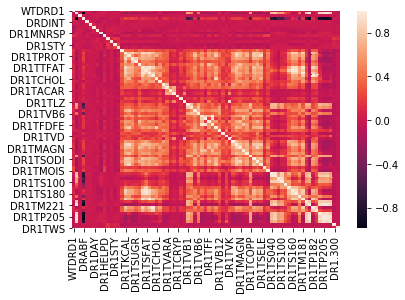

In [35]:
plot1 = plt.figure(1)
corr = normalized_df.corr()
heatmap = sns.heatmap(corr)
plt.savefig('heatmap.png', dpi=400)

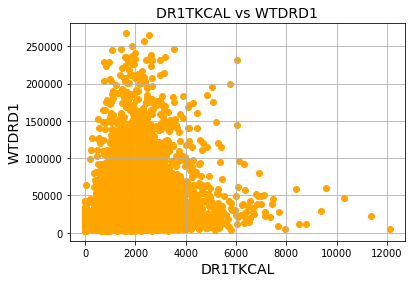

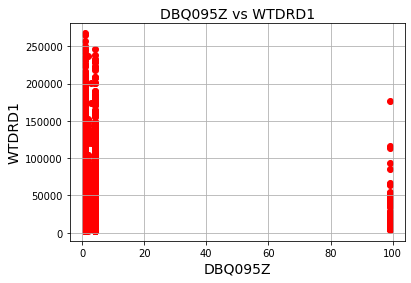

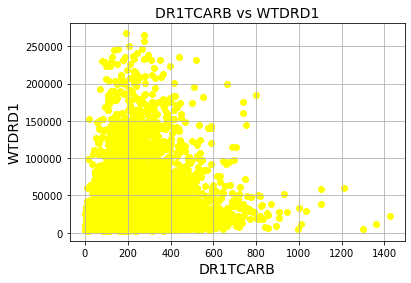

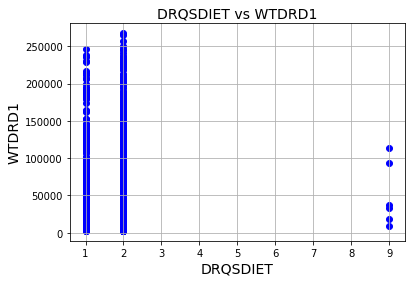

In [36]:
#Looking at the lINEAR realtionships between x and y
plot2 = plt.figure(2)
plt.scatter(dataset['DR1TKCAL'], dataset['WTDRD1'], color='orange')
plt.title('DR1TKCAL vs WTDRD1', fontsize=14)
plt.xlabel('DR1TKCAL', fontsize=14)
plt.ylabel('WTDRD1', fontsize=14)
plt.grid(True)
plt.show()

plot3 = plt.figure(3)
plt.scatter(dataset['DBQ095Z'], dataset['WTDRD1'], color='red')
plt.title('DBQ095Z vs WTDRD1', fontsize=14)
plt.xlabel('DBQ095Z', fontsize=14)
plt.ylabel('WTDRD1', fontsize=14)
plt.grid(True)
plt.show()

plot4 = plt.figure(4)
plt.scatter(dataset['DR1TCARB'], dataset['WTDRD1'], color='yellow')
plt.title('DR1TCARB vs WTDRD1', fontsize=14)
plt.xlabel('DR1TCARB', fontsize=14)
plt.ylabel('WTDRD1', fontsize=14)
plt.grid(True)
plt.show()

plot5 = plt.figure(5)
plt.scatter(dataset['DRQSDIET'], dataset['WTDRD1'], color='blue')
plt.title('DRQSDIET vs WTDRD1', fontsize=14)
plt.xlabel('DRQSDIET', fontsize=14)
plt.ylabel('WTDRD1', fontsize=14)
plt.grid(True)
plt.show()


In [37]:
#Setting Independant and Dependant variables
X = normalized_df.drop(['WTDRD1'], axis=1)
y = np.ravel(normalized_df[['WTDRD1']])

In [38]:
#Splitting of Training and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(6928, 76) (6928,)
(1733, 76) (1733,)


In [39]:
#Random Forrest Regression
model_rf = RandomForestRegressor(n_estimators=10, random_state=0)
model_rf.fit(X_train, y_train)
#model_rf.show(view='Tree', tree_id=0)
RF_predictions = model_rf.predict(X_test)
print("Random Forest Predictions:\n%s" % model_rf.predict(X_test))
#print("Random Forest Results:\n%s" % model_rf.evaluate(X_test))
print("Random Forest Score:\n%s" % model_rf.score(X_train, y_train))

rms3 = np.sqrt(mean_squared_error(y_test, RF_predictions))
print('RF_MSE: \n', rms3)


Random Forest Predictions:
[0.08654547 0.02634605 0.10205027 ... 0.08471187 0.21750698 0.02582507]
Random Forest Score:
0.8601242170009731
RF_MSE: 
 0.1221542300148471


In [40]:
#Making our Prediction using Linear Regression
#regr = linear_model.LinearRegression()
regr = linear_model.SGDRegressor(max_iter=1000, power_t = 0.5, eta0 = 1, tol = 1e-3)
MLP_regr = MLPRegressor(max_iter=10000,
                             hidden_layer_sizes=(100,), 
                             activation='relu',
                             solver='adam',)

In [41]:
#Fitting the model
model_lr = regr.fit(X_train, y_train)
MLP_lr = MLP_regr.fit(X_train, y_train)
#Predicting the test set results
predictions = regr.predict(X_test)
MLP_predictions = MLP_lr.predict(X_test)
print('Linear Regression Predictions: \n', predictions)
print('Linear Regression Predictions with MLP: \n', MLP_predictions)
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Linear Regression Predictions: 
 [0.08598054 0.02431023 0.08372565 ... 0.12931774 0.12085438 0.04336468]
Linear Regression Predictions with MLP: 
 [ 0.06178257  0.01622705  0.05874942 ...  0.10247636  0.21395035
 -0.04158961]
Intercept: 
 [-0.01148732]
Coefficients: 
 [-0.0544659  -0.0099636   0.05210016  0.00934909  0.03033079 -0.08050637
 -0.10555278 -0.02785962  0.22030207 -0.03274047 -0.03793786  0.0403123
  0.29446279  0.08670101  0.02931926  0.19093217 -0.08187558  0.03362427
 -0.01960039 -0.02557019 -0.012454   -0.1098737   0.00729541 -0.00057732
  0.31468022  0.09695141  0.10737951  0.03556519  0.01398714 -0.04644985
  0.00777183  0.01901719  0.29765948 -0.02355087  0.06107675 -0.01746901
 -0.05794698 -0.04028049 -0.03564763 -0.05209539  0.02690481 -0.16047063
 -0.19216513 -0.11292938  0.02611234 -0.05749312  0.15456778  0.01778901
 -0.02032209 -0.13394024  0.00863251  0.09402639 -0.13724058 -0.01314658
  0.10590677  0.2721286   0.04545999  0.00040766 -0.06560182  0.05597361
 -

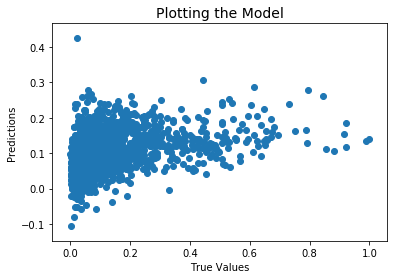

In [42]:
#Plotting the Linear Regression Model
plot2 = plt.figure(6)
plt.scatter(y_test, predictions)
plt.title('Plotting the Model', fontsize=14)
plt.xlabel('True Values', fontsize=10)
plt.ylabel('Predictions', fontsize=10)
plt.savefig('Model_Plot.png', dpi=400)

In [43]:
#MSE
rms = np.sqrt(mean_squared_error(y_test, predictions))
print('MSE: \n', rms)

MSE: 
 0.1366308308069287


In [44]:
rms2 = np.sqrt(mean_squared_error(y_test, MLP_predictions))
print('MLP_MSE: \n', rms2)

MLP_MSE: 
 0.12434120201059255


In [45]:
#R Squared Score of Linear Regression
r_squared = r2_score(y_test, predictions)
print("R Squared Score:\n%s" % r_squared)

R Squared Score:
0.10313057589847674


In [46]:
r_squared_2 = r2_score(y_test, MLP_predictions)
print("MLP R Squared Score:\n%s" % r_squared_2)

MLP R Squared Score:
0.2572170558389455


In [47]:
#Cross Validation
print("Cross_Val_Predictions:\n%s" % cross_val_predict(regr, X, y, cv=5))
print("Cross_Val_score:\n%s" % cross_val_score(regr, X, y, cv = 5))

Cross_Val_Predictions:
[0.13105771 0.06582875 0.10560083 ... 0.08025754 0.08733495 0.07828194]
Cross_Val_score:
[-173.41140655 -111.25611764  -45.70004993   -4.27381773   -2.97248861]


In [48]:
print("Cross_Val_score:\n%s" % cross_val_score(MLP_regr, X, y, cv = 5))

Cross_Val_score:
[ -91.05279864 -178.76849097  -67.44155904  -12.41816982   -2.65401979]


In [49]:
keras_model = Sequential([
    Dense(77, input_shape=(76,), activation='relu'),
    Dense(39, activation='relu'),
    Dense(1, activation=None)
])

In [50]:
keras_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 77)                5929      
_________________________________________________________________
dense_2 (Dense)              (None, 39)                3042      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 40        
Total params: 9,011
Trainable params: 9,011
Non-trainable params: 0
_________________________________________________________________


In [51]:
keras_model.compile(Adam(lr=0.0001), loss='mse', metrics=['mse'])

In [52]:
history = keras_model.fit(X_train, y_train, epochs=150, batch_size=100, verbose=1, validation_split=0.1, shuffle=True)

Train on 6235 samples, validate on 693 samples
Epoch 1/150
6235/6235 [==============================] - 1s 164us/step - loss: 0.0186 - mse: 0.0186 - val_loss: 0.0167 - val_mse: 0.0167
Epoch 2/150
6235/6235 [==============================] - 0s 24us/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0161 - val_mse: 0.0161
Epoch 3/150
6235/6235 [==============================] - 0s 28us/step - loss: 0.0161 - mse: 0.0161 - val_loss: 0.0158 - val_mse: 0.0158
Epoch 4/150
6235/6235 [==============================] - 0s 23us/step - loss: 0.0158 - mse: 0.0158 - val_loss: 0.0156 - val_mse: 0.0156
Epoch 5/150
6235/6235 [==============================] - 0s 22us/step - loss: 0.0155 - mse: 0.0155 - val_loss: 0.0155 - val_mse: 0.0155
Epoch 6/150
6235/6235 [==============================] - 0s 25us/step - loss: 0.0153 - mse: 0.0153 - val_loss: 0.0154 - val_mse: 0.0154
Epoch 7/150
6235/6235 [==============================] - 0s 22us/step - loss: 0.0150 - mse: 0.0150 - val_loss: 0.0153 - val_mse: 0.0153


6235/6235 [==============================] - 0s 36us/step - loss: 0.0124 - mse: 0.0124 - val_loss: 0.0140 - val_mse: 0.0140
Epoch 61/150
6235/6235 [==============================] - 0s 36us/step - loss: 0.0124 - mse: 0.0124 - val_loss: 0.0138 - val_mse: 0.0138
Epoch 62/150
6235/6235 [==============================] - 0s 28us/step - loss: 0.0124 - mse: 0.0124 - val_loss: 0.0139 - val_mse: 0.0139
Epoch 63/150
6235/6235 [==============================] - 0s 33us/step - loss: 0.0123 - mse: 0.0123 - val_loss: 0.0139 - val_mse: 0.0139
Epoch 64/150
6235/6235 [==============================] - 0s 25us/step - loss: 0.0123 - mse: 0.0123 - val_loss: 0.0139 - val_mse: 0.0139
Epoch 65/150
6235/6235 [==============================] - 0s 28us/step - loss: 0.0123 - mse: 0.0123 - val_loss: 0.0139 - val_mse: 0.0139
Epoch 66/150
6235/6235 [==============================] - 0s 35us/step - loss: 0.0123 - mse: 0.0123 - val_loss: 0.0139 - val_mse: 0.0139
Epoch 67/150
6235/6235 [==============================

Epoch 120/150
6235/6235 [==============================] - 0s 23us/step - loss: 0.0114 - mse: 0.0114 - val_loss: 0.0135 - val_mse: 0.0135
Epoch 121/150
6235/6235 [==============================] - 0s 22us/step - loss: 0.0114 - mse: 0.0114 - val_loss: 0.0136 - val_mse: 0.0136
Epoch 122/150
6235/6235 [==============================] - 0s 22us/step - loss: 0.0113 - mse: 0.0113 - val_loss: 0.0136 - val_mse: 0.0136
Epoch 123/150
6235/6235 [==============================] - 0s 22us/step - loss: 0.0113 - mse: 0.0113 - val_loss: 0.0138 - val_mse: 0.0138
Epoch 124/150
6235/6235 [==============================] - 0s 21us/step - loss: 0.0113 - mse: 0.0113 - val_loss: 0.0137 - val_mse: 0.0137
Epoch 125/150
6235/6235 [==============================] - 0s 22us/step - loss: 0.0113 - mse: 0.0113 - val_loss: 0.0135 - val_mse: 0.0135
Epoch 126/150
6235/6235 [==============================] - 0s 22us/step - loss: 0.0113 - mse: 0.0113 - val_loss: 0.0136 - val_mse: 0.0136
Epoch 127/150
6235/6235 [=========

dict_keys(['val_loss', 'val_mse', 'loss', 'mse'])


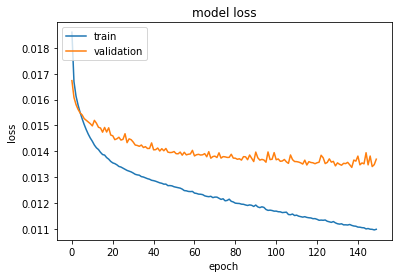

In [53]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [54]:
Keras_Predictions = keras_model.predict(X_test, batch_size = 100, verbose=0)

In [55]:
for i in Keras_Predictions:
    print (i)

[0.08349514]
[0.00862207]
[0.0422084]
[0.07962938]
[0.03721556]
[0.06619974]
[0.04722431]
[0.04871783]
[0.08838099]
[0.02810135]
[0.1749337]
[0.10399082]
[0.19084212]
[0.09356389]
[0.23030043]
[0.09664091]
[0.12768084]
[0.04746125]
[0.07099848]
[0.00017924]
[0.22720261]
[0.14178285]
[0.08920585]
[0.215628]
[0.07029925]
[0.02948521]
[0.09973847]
[0.04363625]
[0.08538461]
[0.13773757]
[0.14024073]
[0.02681816]
[0.04033639]
[0.14525235]
[0.07956669]
[0.16623498]
[0.13177386]
[0.04360488]
[0.06629908]
[0.14490925]
[0.14861843]
[0.29490137]
[0.11291608]
[0.06038994]
[0.01721846]
[0.08273963]
[0.09854059]
[0.03232208]
[0.09813556]
[0.06005857]
[0.17321682]
[0.1717881]
[0.06103634]
[0.04375035]
[0.12001359]
[0.19407746]
[0.13659708]
[0.1458428]
[0.03286335]
[0.08163215]
[0.06201433]
[0.1460717]
[0.14868516]
[0.10814227]
[0.09800866]
[0.14866374]
[0.03479758]
[0.13123228]
[0.04705049]
[0.05348371]
[0.11155912]
[0.09606806]
[0.0662632]
[0.16602948]
[0.10367816]
[0.01365002]
[0.18135712]
[0.1121

[0.2170465]
[0.10077069]
[0.07772198]
[0.01972197]
[0.25717932]
[0.20356247]
[0.09242848]
[0.02208763]
[0.13400225]
[0.32209092]
[0.1519877]
[0.11366189]
[0.12441248]
[0.1991195]
[0.30872583]
[0.02449158]
[0.15581606]
[0.10809475]
[0.07906616]
[0.14783466]
[0.05626503]
[0.09482972]
[0.13675843]
[0.03182644]
[0.07367475]
[0.08194739]
[0.15266654]
[0.08510356]
[0.06362765]
[0.2677953]
[0.17265624]
[0.13728191]
[0.10047758]
[0.02713843]
[0.01854214]
[0.02501606]
[0.23359168]
[0.00599442]
[0.11881834]
[0.04021676]
[0.03107339]
[0.01969614]
[0.0734171]
[0.17243224]
[0.08728231]
[0.28589314]
[0.06875335]
[0.1963056]
[0.07068209]
[0.10135292]
[0.34685296]
[0.08278885]
[0.04079533]
[0.1358096]
[0.00929274]
[0.19810739]
[0.21580836]
[0.11040609]
[0.0783838]
[0.05486098]
[0.13552277]
[0.09418665]
[0.01805758]
[0.2603157]
[0.05713862]
[0.04773809]
[0.05041012]
[0.16035797]
[0.15178946]
[0.22066271]
[0.09706826]
[0.0523419]
[0.12018602]
[0.09696464]
[0.2542546]
[0.0399976]
[0.15387248]
[0.17396568

In [56]:
r_squared_3 = r2_score(y_test, Keras_Predictions)
print(r_squared_3)

0.28556278244713074
